# Tarefa

1. Teste outras métricas para o [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics) nos dados SMS Spam Collection Data Set. Qual métrica obteve a melhor acurácia? Compare o desempenho do kNN ao Naive Bayes nesse problema.

    - Observação:
        - Divida o conjunto de dados SMS Spam Collection em 3 subconjuntos disjuntos: Treinamento (70%), Validação (15%) e Teste (15%).
        - Treine o modelo com o conjunto de Treinamento (70%).
        - Selecione a melhor métrica de acordo com o desempenho do modelo no conjunto de Validação (15%).
        - Treine o melhor modelo no conjunto Treinamento (70%) + Validação (15%).
        - Reporte a performance obtida no conjunto de Teste (15%).

2. Carregue o conjunto de dados Optical Recognition of Handwritten Digits (ORHD) do UCI Machine Learning
[link](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits)

- lembre-se de instalar a biblioteca:

    `!pip install ucimlrepo`

- Para carregar a base de dados utilize:

    ```python
    ORHD = fetch_ucirepo(id=80)
    ```

- Pré-processe os dados:

    ```python
    features = ORHD.data.features.to_numpy().astype(np.float32) / 16.  # normaliza para o intervalo [0, 1]
    targets  = ORHD.data.targets.to_numpy().astype(np.int64)
    ```

- Transforme os dados (características/features/atributos de entrada) em valores binários:

    - feature >= 0.5 deverá ser mapeado para 1

    - feature < 0.5 deverá ser mapeado para 0

- Divida o conjunto de dados Optical Recognition of Handwritten Digits (ORHD) em 3 subconjuntos disjuntos: Treinamento (70%), Validação (15%) e Teste (15%).

- Treine um modelo Naive Bayes (Bernoulli) com o conjunto Treinamento (70%) + Validação (15%).

- Calcule as acurácias (conjunto de Teste (15%)) e a matriz de confusão.

- Treine um modelo k-NN nos mesmos dados Optical Recognition of Handwritten Digits (ORHD) binarizados e compare os resultados com o Naive Bayes.

    - Observação:
        - Treine o k-NN com o conjunto de Treinamento (70%).
        - Selecione a melhor métrica e melhor número de vizinhos de acordo com o desempenho do modelo no conjunto de Validação (15%).
        - Treine o melhor modelo no conjunto Treinamento (70%) + Validação (15%).
        - Reporte a performance obtida no conjunto de Teste (15%).

**Entregáveis**:

1. Código (notebook `*.ipynb`).

2. Relatório `*.pdf` (compile seus resultados e inclua as figuras).

In [1]:
# Importação das bibliotecas necessárias
import numpy as np                                            # Biblioteca para operações numéricas
import pandas as pd                                           # Biblioteca para manipulação de dados em DataFrames
from sklearn.model_selection import train_test_split          # Função para dividir os dados em treino e teste
from sklearn.feature_extraction.text import CountVectorizer   # Transforma texto em representações vetoriais
from sklearn.naive_bayes import BernoulliNB                   # Classificador Naive Bayes com distribuição de Bernoulli
from sklearn.neighbors import KNeighborsClassifier            # Classificador k-NN
from sklearn.tree import DecisionTreeClassifier               # Árvore de decisão
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             classification_report )          # Métricas de avaliação
import matplotlib.pyplot as plt                               # Biblioteca de visualização gráfica
import seaborn as sns                                         # Biblioteca de visualização baseada em matplotlib, com estilo melhorado

In [2]:
# Carregamento do dataset de spam
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

Pré processamento

In [3]:
# Conversão dos rótulos para valores binários
df['label'] = df['label'].map({'ham': 0, 'spam': 1})#mapeamento

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(  # Divide dados em conjuntos de treinamento (70%) e de teste (30%)
    df['message'],  # Variável independente: textos das mensagens
    df['label'],    # Variável dependente: rótulo binário
    test_size=0.3,  # Proporção de teste: 30%
    random_state=42 # Semente para reprodutibilidade dos resultados
)
X_validation, X_test, y_validation, y_test = train_test_split(  # Divide dados em conjuntos de treinamento (70%) e de teste (30%)
    X_test,  # Variável independente: textos das mensagens
    y_test,    # Variável dependente: rótulo binário
    test_size=0.5,  # Proporção de teste: 30%
    random_state=42 # Semente para reprodutibilidade dos resultados
)
#instancia o vectorizer##

# Transformação dos textos em vetores de contagem de palavras (binário)
vectorizer = CountVectorizer(binary=True)         # Inicializa o vetor com contagem binária (presença/ausência da palavra)
X_train_vec = vectorizer.fit_transform(X_train)   # Ajusta e transforma o conjunto de treinamento em vetores binários ## pra dpois aplicar no teste
X_validation_vec = vectorizer.transform(X_validation)
X_test_vec = vectorizer.transform(X_test)         # Transforma o conjunto de teste com o mesmo vocabulário aprendido no conjunto de treinamento

In [4]:
feature_names = vectorizer.get_feature_names_out() #okens aprendidos pelo vectorizer
X_train_df = pd.DataFrame(X_train_vec.toarray(), columns=feature_names)
print(f'"Vocabulário aprendido:{feature_names}\n')
display(X_train_df.tail(15))

"Vocabulário aprendido:['00' '000' '000pes' ... 'zouk' 'zyada' 'èn']



,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,02,0207,...,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn
3885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Testando outras métricas com o K-NN para selecionar a melhor métrica de distância

In [5]:
# Treinamento dos modelos
models = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}
metrics = ['minkowski', 'cityblock', 'cosine', 'euclidean', 'manhattan']

# Treinamento e avaliação de cada modelo
results = {}
for metric_name in metrics:
    KNN = KNeighborsClassifier(metric=metric_name)
    KNN.fit(X_train_vec, y_train)
    y_pred = KNN.predict(X_validation_vec)
    accuracy = accuracy_score(y_validation, y_pred)
    results[metric_name] = {
        "accuracy": accuracy,
        "classification_report": classification_report(y_validation, y_pred),
        "confusion_matrix": confusion_matrix(y_validation, y_pred)
    }
    print(f"Modelo: {metric_name}")
    print(f"Precisão: {accuracy:.4f}")
    print("Relatório de Classificação:")
    print(results[metric_name]["classification_report"])
    print("Matriz de Confusão:")
    print(results[metric_name]["confusion_matrix"])
    print("-" * 60)

Modelo: minkowski
Precisão: 0.9151
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       724
           1       1.00      0.37      0.54       112

    accuracy                           0.92       836
   macro avg       0.96      0.68      0.74       836
weighted avg       0.92      0.92      0.90       836

Matriz de Confusão:
[[724   0]
 [ 71  41]]
------------------------------------------------------------
Modelo: cityblock
Precisão: 0.9151
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       724
           1       1.00      0.37      0.54       112

    accuracy                           0.92       836
   macro avg       0.96      0.68      0.74       836
weighted avg       0.92      0.92      0.90       836

Matriz de Confusão:
[[724   0]
 [ 71  41]]
------------------------------------------------------------
Modelo: cosi

A métrica 'cosine obteve melhor desempenho de acurácia e matriz de confusão'

In [6]:
#X_test = X_test.vstack(X_validation)
X_test_vec = X_test_vec + X_validation_vec


# Treinamento do modelo com a distância 'cosine' e a performance no conjunto teste (15%)

In [7]:
KNN = KNeighborsClassifier(metric='cosine')
KNN.fit(X_train_vec, y_train)
y_pred = KNN.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
results['cosine'] = {
    "accuracy": accuracy,
    "classification_report": classification_report(y_test, y_pred),
    "confusion_matrix": confusion_matrix(y_test, y_pred)
}
print(f"Modelo: {'cosine'}")
print(f"Precisão: {accuracy:.4f}")
print("Relatório de Classificação:")
print(results['cosine']["classification_report"])
print("Matriz de Confusão:")
print(results['cosine']["confusion_matrix"])
print("-" * 60)

Modelo: cosine
Precisão: 0.8792
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       724
           1       0.54      0.71      0.61       112

    accuracy                           0.88       836
   macro avg       0.74      0.81      0.77       836
weighted avg       0.90      0.88      0.89       836

Matriz de Confusão:
[[656  68]
 [ 33  79]]
------------------------------------------------------------


Precisão do modelo Bernoulli Naive Bayes: 0.9791
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       1.00      0.84      0.92       224

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



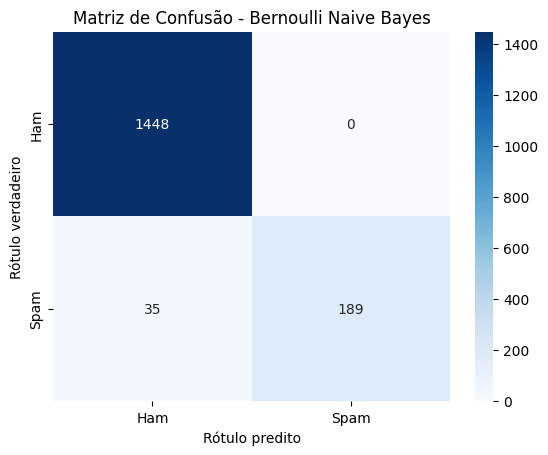

In [ ]:
# Treinamento do modelo Bernoulli Naive Bayes
nb_model = BernoulliNB()            # Cria uma instância do classificador Naive Bayes com distribuição de Bernoulli (para dados binários)
nb_model.fit(X_train_vec, y_train)  # Treina o modelo usando os vetores binários do conjunto de treinamento e os rótulos correspondentes (0 = ham, 1 = spam)

# Predição e avaliação do modelo#ACURÁCIA
y_pred_nb = nb_model.predict(X_test_vec)                                # Faz predições com base nos vetores de teste
accuracy_nb = accuracy_score(y_test, y_pred_nb)                         # Calcula a acurácia comparando as predições com os rótulos reais
print(f"Precisão do modelo Bernoulli Naive Bayes: {accuracy_nb:.4f}")   # Exibe a precisão do modelo com 4 casas decimais

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_nb))                         # Exibe métricas como precisão, recall e F1-score para cada classe (ham e spam)

# Matriz de confusão
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)                    # Gera a matriz de confusão: compara rótulos reais e preditos
#heatmap
sns.heatmap(conf_matrix_nb,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])                                # Cria um mapa de calor da matriz de confusão, com rótulos
plt.ylabel('Rótulo verdadeiro')
plt.xlabel('Rótulo predito')
plt.title('Matriz de Confusão - Bernoulli Naive Bayes')
plt.show()

In [8]:
!pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo
ORHD = fetch_ucirepo(id=80)

usamos o np.rint para arredondar os elementos do array para o inteiro mais próximo para que
- features >= 0.5 sejam iguais 1
- features < 0.5 sejam iguais a 0

In [16]:
features = np.rint(ORHD.data.features.to_numpy().astype(np.float32) / 16.)  # normaliza para o intervalo [0, 1]
targets  = ORHD.data.targets.to_numpy().astype(np.int64)

separa em treino (70%) e teste (30%)

In [22]:
bX_train, bX_test, by_train, by_test = train_test_split(features, targets, test_size=0.3, random_state=42)

separa o teste (30%) em validação (15%) e teste(15%)

In [23]:
bX_validation, bX_test, by_validation, by_test = train_test_split(bX_test, by_test, test_size=0.5, random_state=42)

In [35]:
NBX_train = np.vstack((bX_train, bX_validation))
NBy_train = np.vstack((by_train, by_validation))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisão do modelo Bernoulli Naive Bayes: 0.8754
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        80
           1       0.86      0.82      0.84        91
           2       0.86      0.75      0.80        73
           3       0.96      0.81      0.88        91
           4       0.94      0.89      0.91        90
           5       0.91      0.88      0.89        76
           6       0.93      0.94      0.94        87
           7       0.84      0.98      0.91        89
           8       0.73      0.82      0.77        73
           9       0.78      0.88      0.83        93

    accuracy                           0.88       843
   macro avg       0.88      0.87      0.87       843
weighted avg       0.88      0.88      0.88       843



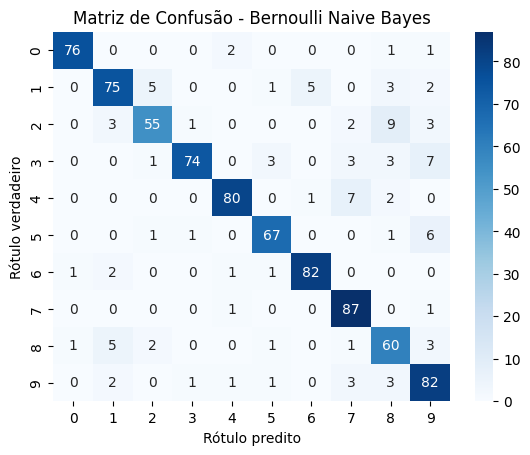

In [71]:
# Treinamento do modelo Bernoulli Naive Bayes
nb_model = BernoulliNB()            # Cria uma instância do classificador Naive Bayes com distribuição de Bernoulli (para dados binários)
nb_model.fit(NBX_train, NBy_train)  # Treina o modelo usando os vetores binários do conjunto de treinamento e os rótulos correspondentes (0 = ham, 1 = spam)

# Predição e avaliação do modelo#ACURÁCIA
by_pred_nb = nb_model.predict(bX_test)                                # Faz predições com base nos vetores de teste
accuracy_nb = accuracy_score(by_test, by_pred_nb)                         # Calcula a acurácia comparando as predições com os rótulos reais
print(f"Precisão do modelo Bernoulli Naive Bayes: {accuracy_nb:.4f}")   # Exibe a precisão do modelo com 4 casas decimais

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(by_test, by_pred_nb))                         # Exibe métricas como precisão, recall e F1-score para cada classe (ham e spam)

# Matriz de confusão
conf_matrix_nb = confusion_matrix(by_test, by_pred_nb)                    # Gera a matriz de confusão: compara rótulos reais e preditos
#heatmap
sns.heatmap(conf_matrix_nb,
            annot=True,
            fmt='d',
            cmap='Blues',)                                # Cria um mapa de calor da matriz de confusão, com rótulos
plt.ylabel('Rótulo verdadeiro')
plt.xlabel('Rótulo predito')
plt.title('Matriz de Confusão - Bernoulli Naive Bayes')
plt.show()

procurando a melhor métrica e o melhor K para o KNN

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

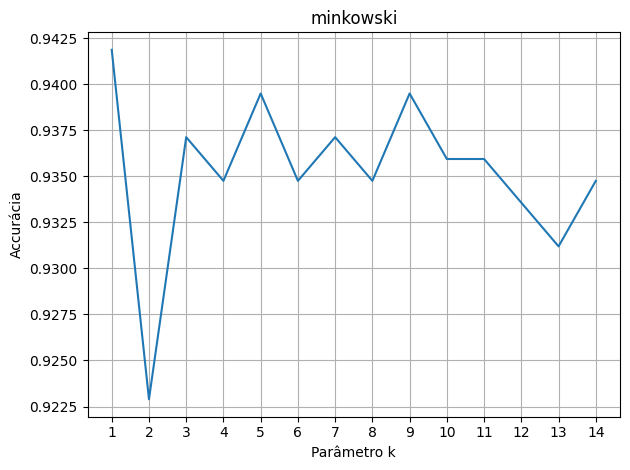

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Modelo: minkowski
K =  14
Precisão: 0.9348
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       0.81      0.99      0.89        82
           2       0.99      0.98      0.98        81
           3       0.89      0.93      0.91        82
           4       0.98      0.92      0.95        92
           5       0.94      0.95      0.94        77
           6       0.99      0.99      0.99        81
           7       0.95      0.97      0.96        97
           8       0.96      0.81      0.88        80
           9       0.92      0.80      0.86        81

    accuracy                           0.93       843
   macro avg       0.94      0.93      0.93       843
weighted avg       0.94      0.93      0.93       843

Matriz de Confusão:
[[90  0  0  0  0  0  0  0  0  0]
 [ 0 81  0  0  1  0  0  0  0  0]
 [ 0  1 79  0  0  0  0  1  0  0]
 [ 0  0  0 76  0  1  0  1  0  4]
 [ 0  3  0  0 85  

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

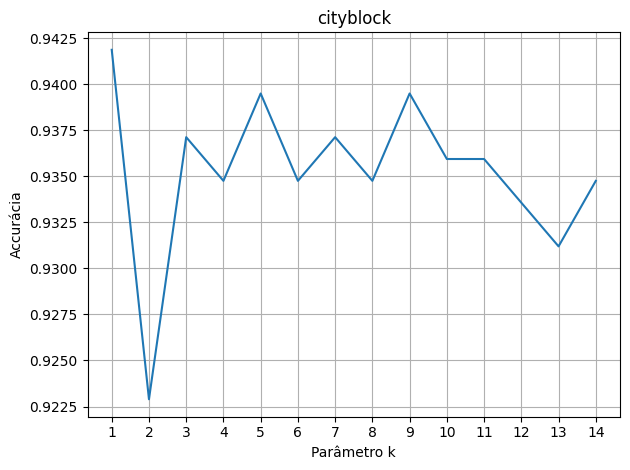

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Modelo: cityblock
K =  14
Precisão: 0.9348
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       0.81      0.99      0.89        82
           2       0.99      0.98      0.98        81
           3       0.89      0.93      0.91        82
           4       0.98      0.92      0.95        92
           5       0.94      0.95      0.94        77
           6       0.99      0.99      0.99        81
           7       0.95      0.97      0.96        97
           8       0.96      0.81      0.88        80
           9       0.92      0.80      0.86        81

    accuracy                           0.93       843
   macro avg       0.94      0.93      0.93       843
weighted avg       0.94      0.93      0.93       843

Matriz de Confusão:
[[90  0  0  0  0  0  0  0  0  0]
 [ 0 81  0  0  1  0  0  0  0  0]
 [ 0  1 79  0  0  0  0  1  0  0]
 [ 0  0  0 76  0  1  0  1  0  4]
 [ 0  3  0  0 85  

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

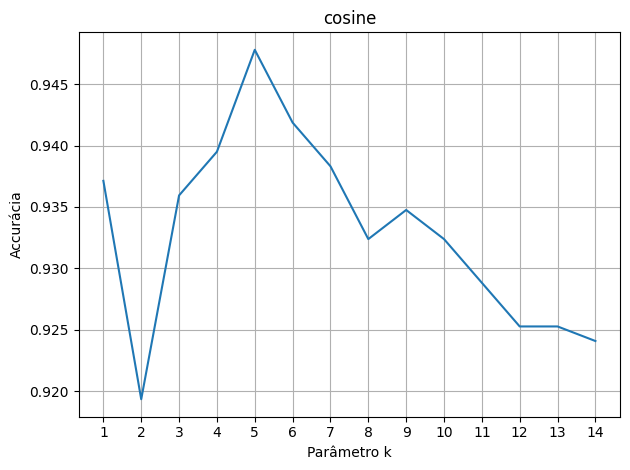

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Modelo: cosine
K =  14
Precisão: 0.9241
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        90
           1       0.78      1.00      0.88        82
           2       0.99      0.96      0.97        81
           3       0.91      0.87      0.89        82
           4       0.99      0.91      0.95        92
           5       0.91      0.94      0.92        77
           6       0.99      0.99      0.99        81
           7       0.94      0.94      0.94        97
           8       0.92      0.82      0.87        80
           9       0.87      0.80      0.83        81

    accuracy                           0.92       843
   macro avg       0.93      0.92      0.92       843
weighted avg       0.93      0.92      0.92       843

Matriz de Confusão:
[[90  0  0  0  0  0  0  0  0  0]
 [ 0 82  0  0  0  0  0  0  0  0]
 [ 0  2 78  0  0  0  0  1  0  0]
 [ 0  0  0 71  0  2  0  1  2  6]
 [ 0  3  0  0 84  2  

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

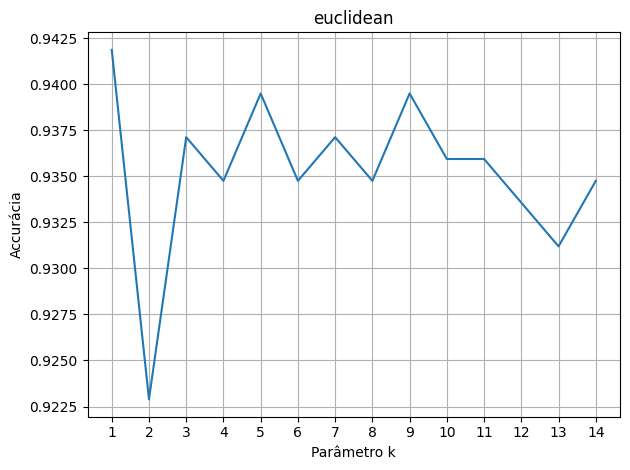

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Modelo: euclidean
K =  14
Precisão: 0.9348
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       0.81      0.99      0.89        82
           2       0.99      0.98      0.98        81
           3       0.89      0.93      0.91        82
           4       0.98      0.92      0.95        92
           5       0.94      0.95      0.94        77
           6       0.99      0.99      0.99        81
           7       0.95      0.97      0.96        97
           8       0.96      0.81      0.88        80
           9       0.92      0.80      0.86        81

    accuracy                           0.93       843
   macro avg       0.94      0.93      0.93       843
weighted avg       0.94      0.93      0.93       843

Matriz de Confusão:
[[90  0  0  0  0  0  0  0  0  0]
 [ 0 81  0  0  1  0  0  0  0  0]
 [ 0  1 79  0  0  0  0  1  0  0]
 [ 0  0  0 76  0  1  0  1  0  4]
 [ 0  3  0  0 85  

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

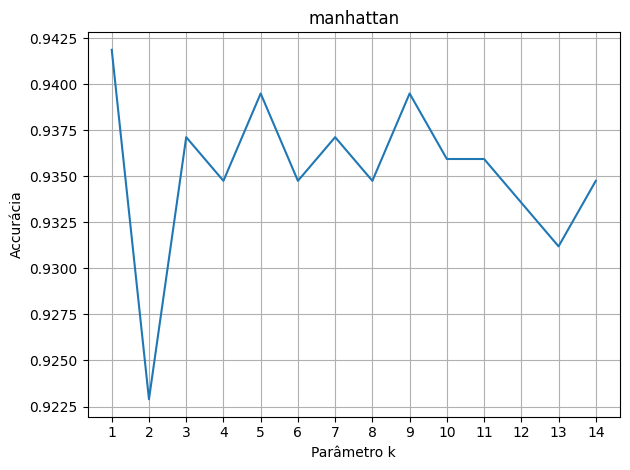

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Modelo: manhattan
K =  14
Precisão: 0.9348
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       0.81      0.99      0.89        82
           2       0.99      0.98      0.98        81
           3       0.89      0.93      0.91        82
           4       0.98      0.92      0.95        92
           5       0.94      0.95      0.94        77
           6       0.99      0.99      0.99        81
           7       0.95      0.97      0.96        97
           8       0.96      0.81      0.88        80
           9       0.92      0.80      0.86        81

    accuracy                           0.93       843
   macro avg       0.94      0.93      0.93       843
weighted avg       0.94      0.93      0.93       843

Matriz de Confusão:
[[90  0  0  0  0  0  0  0  0  0]
 [ 0 81  0  0  1  0  0  0  0  0]
 [ 0  1 79  0  0  0  0  1  0  0]
 [ 0  0  0 76  0  1  0  1  0  4]
 [ 0  3  0  0 85  

In [68]:
metrics = ['minkowski', 'cityblock', 'cosine', 'euclidean', 'manhattan']
#n_neighbors = [1, 3, 7, 15]
k_values = np.arange(1, 15)
# Treinamento e avaliação de cada modelo
results = {}
for metric_name in metrics:
  #for K in n_neighbors:

  acc = []
  for K in k_values:
    knn = KNeighborsClassifier(n_neighbors=K, metric=metric_name)
    knn.fit(bX_train, by_train)
    y_pred = knn.predict(bX_validation)
    acc.append(accuracy_score(by_validation,y_pred))
  acc = np.array(acc)
  plt.plot(k_values, acc)
  plt.xticks(k_values)
  plt.xticks(k_values)
  plt.xlabel('Parâmetro k')
  plt.ylabel('Accurácia')
  plt.title(metric_name)
  plt.grid(True)
  plt.tight_layout()
  plt.show()


  KNN = KNeighborsClassifier(metric=metric_name, n_neighbors=K)
  KNN.fit(bX_train, by_train)
  y_pred = KNN.predict(bX_validation)
  accuracy = accuracy_score(by_validation, y_pred)
  results[metric_name] = {
      "accuracy": accuracy,
      "classification_report": classification_report(by_validation, y_pred),
      "confusion_matrix": confusion_matrix(by_validation, y_pred)
  }
  print(f"Modelo: {metric_name}")
  print("K = ", K)
  print(f"Precisão: {accuracy:.4f}")
  print("Relatório de Classificação:")
  print(results[metric_name]["classification_report"])
  print("Matriz de Confusão:")
  print(results[metric_name]["confusion_matrix"])
  print("-" * 60)

Com isso observamos que a melhor acurácia acontece com a métrica cosine e K = 5

In [70]:
KNN = KNeighborsClassifier(metric='cosine')#n_neighbors padrão ja é 5
KNN.fit(NBX_train, NBy_train)
y_pred = KNN.predict(bX_test)
accuracy = accuracy_score(by_test, y_pred)
results['cosine'] = {
    "accuracy": accuracy,
    "classification_report": classification_report(by_test, y_pred),
    "confusion_matrix": confusion_matrix(by_test, y_pred)
}
print(f"Modelo: {'cosine'}")
print(f"Precisão: {accuracy:.4f}")
print("Relatório de Classificação:")
print(results['cosine']["classification_report"])
print("Matriz de Confusão:")
print(results['cosine']["confusion_matrix"])
print("-" * 60)

Modelo: cosine
Precisão: 0.9549
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        80
           1       0.88      0.99      0.93        91
           2       0.97      0.97      0.97        73
           3       0.98      0.93      0.96        91
           4       0.98      0.98      0.98        90
           5       0.95      0.93      0.94        76
           6       0.99      0.98      0.98        87
           7       1.00      0.99      0.99        89
           8       0.90      0.89      0.90        73
           9       0.91      0.89      0.90        93

    accuracy                           0.95       843
   macro avg       0.96      0.95      0.95       843
weighted avg       0.96      0.95      0.96       843

Matriz de Confusão:
[[79  1  0  0  0  0  0  0  0  0]
 [ 0 90  0  0  0  0  0  0  1  0]
 [ 0  1 71  0  0  0  0  0  0  1]
 [ 0  0  1 85  0  1  0  0  2  2]
 [ 0  1  0  0 88  0  1  0  0 

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Conclusão: o KNN mostrou melhor acurácia (95%) que o Bernoulli Naive Bayes.